In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

import theano
import theano.tensor as T
import pymc3 as pm
theano.config.optimizer_including

from io import StringIO
import sys


In [2]:
# Data Preparation
path_to_data = os.pardir+"/../data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[10,1,10], 
                        path_o = path_to_data + "model1_orientations.csv",
                        path_i = path_to_data + "model1_surface_points.csv") 
geo_data.delete_surfaces('rock1',remove_data=True)
geo_data.delete_surface_points([1,3,4,5])
geo_data.modify_surface_points([0, 2], Y=500)

Active grids: ['regular']


,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,100,500,600,0.2501,0.5001,0.5001,rock2,Default series,1,1,1.000000e-08
2,900,500,600,0.7501,0.5001,0.5001,rock2,Default series,1,1,1.000000e-08


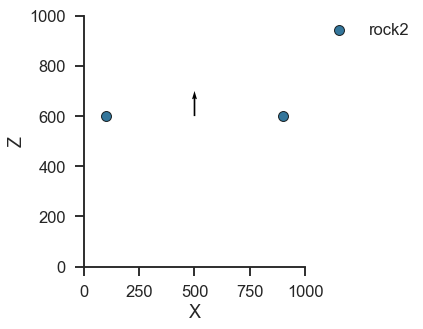

In [3]:
gp.plot.plot_data(geo_data)

In [4]:
gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile',
                         verbose=['compare'])

Compiling theano function...
Compilation Done!


In [5]:
# Cleaning buffer
old_stdout = sys.stdout
mystdout = sys.stdout = StringIO()

# Computing model
gp.compute_model(geo_data)

# Black magic update
sys.stdout = old_stdout

# Split print strings
output = mystdout.getvalue().split('\n')

# Init parameters
n_surface_op_float_sigmoid = []
n_surface_0 = []
n_surface_1 = []
a = []
b = []
drift = []

for s in output:
    if 'n_surface_op_float_sigmoid __str__' in s:
        n_surface_op_float_sigmoid.append(np.fromstring(s[s.find('[[')+2:-2], dtype='float', sep=' '))
    if 'n_surface_0 __str__' in s:
        n_surface_0.append(np.fromstring(s[s.find('[[')+2:-2], dtype='float', sep=' '))
    if 'n_surface_1 __str__' in s:
        n_surface_1.append(np.fromstring(s[s.find('[[')+2:-2], dtype='float', sep=' '))
    if 'a __str__' in s:
        a.append(float(s[s.find('= ')+2:]))
    if 'b __str__' in s:
        b.append(float(s[s.find('= ')+2:]))
    if 'drift[slice_init:slice_init+1][0] __str__' in s:
        drift.append(np.fromstring(s[s.find('[[')+2:-2], dtype='float', sep=' '))

a, b, n_surface_0, n_surface_1, drift

IndexError: index 1 is out of bounds for size 1
Apply node that caused the error: AdvancedSubtensor1(Subtensor{int64:int64:}.0, Elemwise{add,no_inplace}.0)
Toposort index: 680
Inputs types: [TensorType(float64, vector), TensorType(int32, vector)]
Inputs shapes: [(1,), (1,)]
Inputs strides: [(8,), (4,)]
Inputs values: [array([1.0002]), array([1], dtype=int32)]
Inputs type_num: [12, 5]
Outputs clients: [[Join(TensorConstant{0}, MakeVector{dtype='float64'}.0, AdvancedSubtensor1.0, MakeVector{dtype='float64'}.0), AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True}(<TensorType(float64, matrix)>, AdvancedSubtensor1.0, <TensorType(int32, scalar)>, Elemwise{sub,no_inplace}.0), Elemwise{neg,no_inplace}(AdvancedSubtensor1.0), MaxAndArgmax{axis=(0,)}(AdvancedSubtensor1.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/anaconda3/envs/gempy/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-af8e8c5ca485>", line 2, in <module>
    verbose=['compare'])
  File "../../../gempy/core/gempy_api.py", line 166, in set_interpolation_data
    geo_model.interpolator.compile_th_fn(inplace=True)
  File "../../../gempy/core/interpolator.py", line 866, in compile_th_fn
    self.theano_graph.compute_series(),
  File "../../../gempy/core/theano/theano_graph_pro.py", line 277, in compute_series
    profile=False
  File "/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/scan_module/scan.py", line 774, in scan
    condition, outputs, updates = scan_utils.get_updates_and_outputs(fn(*args))
  File "../../../gempy/core/theano/theano_graph_pro.py", line 1433, in compute_a_series
    scalar_field_at_surface_points = self.get_scalar_field_at_surface_points(Z_x, self.npf_op+1)
  File "../../../gempy/core/theano/theano_graph_pro.py", line 1115, in get_scalar_field_at_surface_points
    scalar_field_at_surface_points_values = Z_x[-2 * self.len_points: -self.len_points][npf_op]

Debugprint of the apply node: 
AdvancedSubtensor1 [id A] <TensorType(float64, vector)> ''   
 |Subtensor{int64:int64:} [id B] <TensorType(float64, vector)> ''   
 | |if{} [id C] <TensorType(float64, vector)> ''   
 | | |Vector controlling if scalar matrix must be recomputed[t] [id D] <TensorType(bool, scalar)>
 | | |Subtensor{int64} [id E] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 | | |Subtensor{int32} [id F] <TensorType(float64, vector)> ''   
 | |   |Scalar matrix[t-1] [id G] <TensorType(float64, matrix)>
 | |   |ScalarFromTensor [id H] <int32> ''   
 | |     |<TensorType(int32, scalar)> [id I] <TensorType(int32, scalar)>
 | |ScalarFromTensor [id J] <int64> ''   
 | | |Elemwise{mul,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | |   |TensorConstant{-2} [id L] <TensorType(int8, scalar)>
 | |   |Elemwise{sub,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | |     |Subtensor{int64} [id N] <TensorType(int64, scalar)> ''   
 | |     | |Shape [id O] <TensorType(int64, vector)> ''   
 | |     | | |All the surface_points points at once_copy [id P] <TensorType(float64, matrix)>
 | |     | |Constant{0} [id Q] <int64>
 | |     |Subtensor{int64} [id R] <TensorType(int64, scalar)> ''   
 | |       |Shape [id S] <TensorType(int64, vector)> ''   
 | |       | |Number of points per surface used to split rest-ref_copy [id T] <TensorType(int32, vector)>
 | |       |Constant{0} [id Q] <int64>
 | |ScalarFromTensor [id U] <int64> ''   
 |   |Elemwise{neg,no_inplace} [id V] <TensorType(int64, scalar)> ''   
 |     |Elemwise{sub,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 |Elemwise{add,no_inplace} [id W] <TensorType(int32, vector)> ''   
   |Subtensor{int32:int32:} [id X] <TensorType(int32, vector)> ''   
   | |CumOp{None, add} [id Y] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
   | |ScalarFromTensor [id Z] <int32> ''   
   | | |List with the number of surfaces[t] [id BA] <TensorType(int32, scalar)>
   | |ScalarFromTensor [id BB] <int32> ''   
   |   |List with the number of surfaces[t+1] [id BC] <TensorType(int32, scalar)>
   |TensorConstant{(1,) of 1} [id BD] <TensorType(int8, (True,))>

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.
Apply node that caused the error: for{cpu,Looping}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Number of points per surface used to split rest-ref, fault relation matrix, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, Range, Covariance at 0, <TensorType(float64, scalar)>, Nugget effect of gradients, Nugget effect of scalar, <TensorType(bool, vector)>, Coordinates of the grid points to interpolate, All the surface_points points at once, Position of the dips, Angle of every dip, Azimuth, Polarity, Values that the blocks are taking)
Toposort index: 131
Inputs types: [TensorType(int64, scalar), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int32, vector), TensorType(float64, 4D), TensorType(float64, matrix), TensorType(float64, 3D), TensorType(float64, 3D), TensorType(bool, 3D), TensorType(int32, vector), TensorType(int64, matrix), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, vector), TensorType(float64, vector), TensorType(bool, vector), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, matrix)]
Inputs shapes: [(), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (2, 1, 1, 102), (2, 7), (2, 1, 102), (2, 1, 1), (2, 1, 102), (1,), (2, 2), (), (), (), (), (), (3,), (2,), (2,), (100, 3), (2, 3), (1, 3), (1,), (1,), (1,), (1, 2)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (1,), (1,), (1,), (4,), (8,), (8,), (4,), (816, 816, 816, 8), (56, 8), (816, 816, 8), (8, 8, 8), (102, 102, 1), (4,), (8, 16), (), (), (), (), (), (8,), (8,), (1,), (24, 8), (8, 16), (24, 8), (8,), (8,), (8,), (16, 8)]
Inputs values: [array(1), array([0], dtype=int32), array([1], dtype=int32), array([0], dtype=int32), array([1], dtype=int32), array([0], dtype=int32), array([7], dtype=int32), array([0], dtype=int32), array([1], dtype=int32), array([3], dtype=int32), array([ True]), array([ True]), array([ True]), array([0], dtype=int32), array([0]), array([0]), array([0], dtype=int32), 'not shown', 'not shown', 'not shown', array([[[0.]],

       [[0.]]]), 'not shown', array([1], dtype=int32), array([[0, 0],
       [0, 0]]), array(10.), array(2.), array(1.08253175), array(44.64285714), array(4.), array([0.01, 0.01, 0.01]), array([1.e-08, 1.e-08]), array([False, False]), 'not shown', 'not shown', array([[0.5001, 0.5001, 0.5001]]), array([0.]), array([90.]), array([1.]), array([[1., 2.]])]
Inputs type_num: [7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 7, 7, 5, 12, 12, 12, 12, 0, 5, 7, 12, 12, 12, 12, 12, 12, 12, 0, 12, 12, 12, 12, 12, 12, 12]
Outputs clients: [[Subtensor{int64::}(for{cpu,Looping}.0, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.1, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.2, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.3, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.4, Constant{1})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/anaconda3/envs/gempy/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/anaconda3/envs/gempy/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda3/envs/gempy/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3220, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/anaconda3/envs/gempy/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-af8e8c5ca485>", line 2, in <module>
    verbose=['compare'])
  File "../../../gempy/core/gempy_api.py", line 166, in set_interpolation_data
    geo_model.interpolator.compile_th_fn(inplace=True)
  File "../../../gempy/core/interpolator.py", line 866, in compile_th_fn
    self.theano_graph.compute_series(),
  File "../../../gempy/core/theano/theano_graph_pro.py", line 277, in compute_series
    profile=False

Debugprint of the apply node: 
for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Elemwise{minimum,no_inplace} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Elemwise{minimum,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | | | | | | | | |Elemwise{minimum,no_inplace} [id J] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |Elemwise{minimum,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |Elemwise{minimum,no_inplace} [id L] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id N] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id O] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id P] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |Subtensor{int64} [id Q] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |Shape [id R] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | | | | | | | | | | | | | | | | |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | | |Subtensor{int64} [id U] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |   |Shape [id V] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | |Subtensor{int64} [id X] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |   |Shape [id Y] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | |Subtensor{int64} [id BA] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |   |Shape [id BB] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | |   | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | |Subtensor{int64} [id BD] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |   |Shape [id BE] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | |Subtensor{int64} [id BG] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |   |Shape [id BH] <TensorType(int64, vector)> ''   
 | | | | | | | | | | |   | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | |Subtensor{int64} [id BJ] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |   |Shape [id BK] <TensorType(int64, vector)> ''   
 | | | | | | | | | |   | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | |Subtensor{int64} [id BM] <TensorType(int64, scalar)> ''   
 | | | | | | | | |   |Shape [id BN] <TensorType(int64, vector)> ''   
 | | | | | | | | |   | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | |Subtensor{int64} [id BP] <TensorType(int64, scalar)> ''   
 | | | | | | | |   |Shape [id BQ] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | |Subtensor{int64} [id BS] <TensorType(int64, scalar)> ''   
 | | | | | | |   |Shape [id BT] <TensorType(int64, vector)> ''   
 | | | | | | |   | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | |Subtensor{int64} [id BV] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id BW] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | | | | | |   |Constant{0} [id T] <int64>
 | | | | | |Subtensor{int64} [id BY] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id BZ] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | | | | |   |Constant{0} [id T] <int64>
 | | | | |Subtensor{int64} [id CB] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id CC] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | | | |   |Constant{0} [id T] <int64>
 | | | |Subtensor{int64} [id CE] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id CF] <TensorType(int64, vector)> ''   
 | | |   | |Subtensor{int64::} [id CG] <TensorType(int64, vector)> ''   
 | | |   |   |<TensorType(int64, vector)> [id CH] <TensorType(int64, vector)>
 | | |   |   |Constant{0} [id T] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id CI] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CJ] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id CK] <TensorType(int64, vector)> ''   
 | |   |   |<TensorType(int64, vector)> [id CL] <TensorType(int64, vector)>
 | |   |   |Constant{0} [id T] <int64>
 | |   |Constant{0} [id T] <int64>
 | |TensorConstant{5000} [id CM] <TensorType(int64, scalar)>
 |Subtensor{:int64:} [id CN] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id CP] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CQ] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CR] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CS] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CT] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CU] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CV] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CW] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CX] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CY] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CZ] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DA] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DB] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id CG] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DC] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id CK] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DD] <TensorType(int32, vector)> ''   
 | |TensorConstant{[   0    1..4998 4999]} [id DE] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CO] <int64> ''   
 |IncSubtensor{Set;:int64:} [id DF] <TensorType(float64, 4D)> ''   
 | |Alloc [id DG] <TensorType(float64, 4D)> ''   
 | | |TensorConstant{0.0} [id DH] <TensorType(float64, scalar)>
 | | |Elemwise{add,no_inplace} [id DI] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DJ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DK] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DL] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id DM] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |block matrix [id DN] <TensorType(float64, 3D)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id DO] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DK] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DP] <int64>
 | | |Subtensor{int64} [id DQ] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DK] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id DR] <int64>
 | | |Subtensor{int64} [id DS] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DK] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id DT] <int64>
 | |Rebroadcast{0} [id DL] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id DU] <int64> ''   
 |   |Subtensor{int64} [id DJ] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id DV] <TensorType(float64, matrix)> ''   
 | |Alloc [id DW] <TensorType(float64, matrix)> ''   
 | | |TensorConstant{0.0} [id DX] <TensorType(float64, scalar)>
 | | |Elemwise{add,no_inplace} [id DY] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DZ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EA] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EB] <TensorType(float64, matrix)> ''   
 | | |   |   |InplaceDimShuffle{x,0} [id EC] <TensorType(float64, row)> ''   
 | | |   |     |Weights vector [id ED] <TensorType(float64, vector)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EE] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EA] <TensorType(int64, vector)> ''   
 | |   |Constant{1} [id DP] <int64>
 | |Rebroadcast{0} [id EB] <TensorType(float64, matrix)> ''   
 | |ScalarFromTensor [id EF] <int64> ''   
 |   |Subtensor{int64} [id DZ] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EG] <TensorType(float64, 3D)> ''   
 | |Alloc [id EH] <TensorType(float64, 3D)> ''   
 | | |TensorConstant{0.0} [id EI] <TensorType(float64, scalar)>
 | | |Elemwise{add,no_inplace} [id EJ] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EK] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EL] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EM] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EN] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Scalar matrix [id EO] <TensorType(float64, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EP] <TensorType(int64, scalar)> ''   
 | | | |Shape [id EL] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DP] <int64>
 | | |Subtensor{int64} [id EQ] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EL] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DR] <int64>
 | |Rebroadcast{0} [id EM] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id ER] <int64> ''   
 |   |Subtensor{int64} [id EK] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id ES] <TensorType(float64, 3D)> ''   
 | |Alloc [id ET] <TensorType(float64, 3D)> ''   
 | | |TensorConstant{0.0} [id EU] <TensorType(float64, scalar)>
 | | |Elemwise{add,no_inplace} [id EV] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EW] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EX] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EY] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EZ] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Alloc [id FA] <TensorType(float64, matrix)> ''   
 | | |   |       |TensorConstant{0.0} [id FB] <TensorType(float64, scalar)>
 | | |   |       |Subtensor{int64} [id FC] <TensorType(int64, scalar)> ''   
 | | |   |       | |Shape [id FD] <TensorType(int64, vector)> ''   
 | | |   |       | | |<TensorType(int64, vector)> [id CH] <TensorType(int64, vector)>
 | | |   |       | |Constant{0} [id T] <int64>
 | | |   |       |Subtensor{int64} [id FE] <TensorType(int32, scalar)> ''   
 | | |   |         |List with the number of surfaces [id FF] <TensorType(int32, vector)>
 | | |   |         |Constant{-1} [id FG] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FH] <TensorType(int64, scalar)> ''   
 | | | |Shape [id EX] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DP] <int64>
 | | |Subtensor{int64} [id FI] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EX] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DR] <int64>
 | |Rebroadcast{0} [id EY] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id FJ] <int64> ''   
 |   |Subtensor{int64} [id EW] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FK] <TensorType(bool, 3D)> ''   
 | |Alloc [id FL] <TensorType(bool, 3D)> ''   
 | | |TensorConstant{False} [id FM] <TensorType(bool, scalar)>
 | | |Elemwise{add,no_inplace} [id FN] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FP] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FQ] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FR] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |mask matrix [id FS] <TensorType(bool, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FT] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FP] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DP] <int64>
 | | |Subtensor{int64} [id FU] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FP] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DR] <int64>
 | |Rebroadcast{0} [id FQ] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id FV] <int64> ''   
 |   |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 |Number of points per surface used to split rest-ref [id FW] <TensorType(int32, vector)>
 |fault relation matrix [id FX] <TensorType(int64, matrix)>
 |<TensorType(float64, scalar)> [id FY] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id FZ] <TensorType(float64, scalar)>
 |Range [id GA] <TensorType(float64, scalar)>
 |Covariance at 0 [id GB] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id GC] <TensorType(float64, scalar)>
 |Nugget effect of gradients [id GD] <TensorType(float64, vector)>
 |Nugget effect of scalar [id GE] <TensorType(float64, vector)>
 |<TensorType(bool, vector)> [id GF] <TensorType(bool, vector)>
 |Coordinates of the grid points to interpolate [id GG] <TensorType(float64, matrix)>
 |All the surface_points points at once [id GH] <TensorType(float64, matrix)>
 |Position of the dips [id GI] <TensorType(float64, matrix)>
 |Angle of every dip [id GJ] <TensorType(float64, vector)>
 |Azimuth [id GK] <TensorType(float64, vector)>
 |Polarity [id GL] <TensorType(float64, vector)>
 |Values that the blocks are taking [id GM] <TensorType(float64, matrix)>
for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   

Inner graphs of the scan ops:

for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::} [id GN] <TensorType(float64, 3D)> ''   
 > |block matrix[t-1] [id GO] <TensorType(float64, 3D)> -> [id DF]
 > |if{} [id GP] <TensorType(float64, matrix)> ''   
 > | |Vector controlling if block matrix must be recomputed[t] [id GQ] <TensorType(bool, scalar)> -> [id CZ]
 > | |Sum{axis=[0], acc_dtype=float64} [id GR] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | |Subtensor{int32, ::} [id GS] <TensorType(float64, matrix)> ''   
 > |   |block matrix[t-1] [id GO] <TensorType(float64, 3D)> -> [id DF]
 > |   |ScalarFromTensor [id GT] <int32> ''   
 > |     |<TensorType(int32, scalar)> [id GU] <TensorType(int32, scalar)> -> [id DD]
 > |ScalarFromTensor [id GT] <int32> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 > |Weights vector[t-1] [id GW] <TensorType(float64, vector)> -> [id DV]
 > |if{} [id GX] <TensorType(float64, vector)> ''   
 > | |Vector controlling if weights must be recomputed[t] [id GY] <TensorType(bool, scalar)> -> [id CX]
 > | |Reshape{1} [id GZ] <TensorType(float64, vector)> 'Dual Kriging parameters'   
 > | |Subtensor{int32:int32:} [id HA] <TensorType(float64, vector)> ''   
 > |   |Weights vector[t-1] [id GW] <TensorType(float64, vector)> -> [id DV]
 > |   |ScalarFromTensor [id HB] <int32> ''   
 > |   | |Length of weights in every series[t] [id HC] <TensorType(int32, scalar)> -> [id CS]
 > |   |ScalarFromTensor [id HD] <int32> ''   
 > |     |Length of weights in every series[t+1] [id HE] <TensorType(int32, scalar)> -> [id CT]
 > |ScalarFromTensor [id HB] <int32> ''   
 > |ScalarFromTensor [id HD] <int32> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 > |Scalar matrix[t-1] [id HG] <TensorType(float64, matrix)> -> [id EG]
 > |if{} [id HH] <TensorType(float64, vector)> ''   
 > | |Vector controlling if scalar matrix must be recomputed[t] [id HI] <TensorType(bool, scalar)> -> [id CY]
 > | |Subtensor{int64} [id HJ] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 > | |Subtensor{int32} [id HK] <TensorType(float64, vector)> ''   
 > |   |Scalar matrix[t-1] [id HG] <TensorType(float64, matrix)> -> [id EG]
 > |   |ScalarFromTensor [id GT] <int32> ''   
 > |ScalarFromTensor [id GT] <int32> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 > |<TensorType(float64, matrix)> [id HM] <TensorType(float64, matrix)> -> [id ES]
 > |AdvancedSubtensor1 [id HN] <TensorType(float64, vector)> ''   
 > | |Subtensor{int64:int64:} [id HO] <TensorType(float64, vector)> ''   
 > | | |if{} [id HH] <TensorType(float64, vector)> ''   
 > | | |ScalarFromTensor [id HP] <int64> ''   
 > | | | |Elemwise{mul,no_inplace} [id HQ] <TensorType(int64, scalar)> ''   
 > | | |   |TensorConstant{-2} [id HR] <TensorType(int8, scalar)>
 > | | |   |Elemwise{sub,no_inplace} [id HS] <TensorType(int64, scalar)> ''   
 > | | |     |Subtensor{int64} [id HT] <TensorType(int64, scalar)> ''   
 > | | |     | |Shape [id HU] <TensorType(int64, vector)> ''   
 > | | |     | | |All the surface_points points at once_copy [id HV] <TensorType(float64, matrix)> -> [id GH]
 > | | |     | |Constant{0} [id HW] <int64>
 > | | |     |Subtensor{int64} [id HX] <TensorType(int64, scalar)> ''   
 > | | |       |Shape [id HY] <TensorType(int64, vector)> ''   
 > | | |       | |Number of points per surface used to split rest-ref_copy [id HZ] <TensorType(int32, vector)> -> [id FW]
 > | | |       |Constant{0} [id HW] <int64>
 > | | |ScalarFromTensor [id IA] <int64> ''   
 > | |   |Elemwise{neg,no_inplace} [id IB] <TensorType(int64, scalar)> ''   
 > | |     |Elemwise{sub,no_inplace} [id HS] <TensorType(int64, scalar)> ''   
 > | |Elemwise{add,no_inplace} [id IC] <TensorType(int32, vector)> ''   
 > |   |Subtensor{int32:int32:} [id ID] <TensorType(int32, vector)> ''   
 > |   | |CumOp{None, add} [id IE] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
 > |   | |ScalarFromTensor [id IF] <int32> ''   
 > |   | | |List with the number of surfaces[t] [id IG] <TensorType(int32, scalar)> -> [id CU]
 > |   | |ScalarFromTensor [id IH] <int32> ''   
 > |   |   |List with the number of surfaces[t+1] [id II] <TensorType(int32, scalar)> -> [id CV]
 > |   |TensorConstant{(1,) of 1} [id IJ] <TensorType(int8, (True,))>
 > |<TensorType(int32, scalar)> [id GU] <TensorType(int32, scalar)> -> [id DD]
 > |Elemwise{sub,no_inplace} [id IK] <TensorType(int32, vector)> ''   
 >   |Subtensor{int32:int32:} [id IL] <TensorType(int32, vector)> ''   
 >   | |TensorConstant{[   1    2..4998 4999]} [id IM] <TensorType(int32, vector)>
 >   | |ScalarFromTensor [id IF] <int32> ''   
 >   | |ScalarFromTensor [id IH] <int32> ''   
 >   |TensorConstant{(1,) of 1} [id IJ] <TensorType(int8, (True,))>
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   
 > |IncSubtensor{Set;int32, ::} [id IO] <TensorType(bool, matrix)> ''   
 > | |mask matrix[t-1] [id IP] <TensorType(bool, matrix)> -> [id FK]
 > | |if{} [id IQ] <TensorType(bool, vector)> ''   
 > | | |<TensorType(int64, scalar)> [id IR] <TensorType(int64, scalar)> -> [id DC]
 > | | |Elemwise{gt,no_inplace} [id IS] <TensorType(bool, vector)> ''   
 > | | | |if{} [id HH] <TensorType(float64, vector)> ''   
 > | | | |InplaceDimShuffle{x} [id IT] <TensorType(float64, (True,))> ''   
 > | | |   |MaxAndArgmax{axis=(0,)}.0 [id IU] <TensorType(float64, scalar)> 'max'   
 > | | |Subtensor{int32, ::} [id IV] <TensorType(bool, vector)> ''   
 > | |   |mask matrix[t-1] [id IP] <TensorType(bool, matrix)> -> [id FK]
 > | |   |ScalarFromTensor [id IW] <int32> ''   
 > | |     |Elemwise{sub,no_inplace} [id IX] <TensorType(int32, scalar)> ''   
 > | |       |<TensorType(int32, scalar)> [id GU] <TensorType(int32, scalar)> -> [id DD]
 > | |       |TensorConstant{1} [id IY] <TensorType(int8, scalar)>
 > | |ScalarFromTensor [id IW] <int32> ''   
 > |if{} [id IZ] <TensorType(bool, vector)> ''   
 > | |<TensorType(int64, scalar)> [id JA] <TensorType(int64, scalar)> -> [id DB]
 > | |Elemwise{gt,no_inplace} [id JB] <TensorType(bool, vector)> ''   
 > | | |if{} [id HH] <TensorType(float64, vector)> ''   
 > | | |InplaceDimShuffle{x} [id JC] <TensorType(float64, (True,))> ''   
 > | |   |Elemwise{neg,no_inplace} [id JD] <TensorType(float64, scalar)> ''   
 > | |     |MaxAndArgmax{axis=(0,)}.0 [id JE] <TensorType(float64, scalar)> 'max'   
 > | |Elemwise{mul,no_inplace} [id JF] <TensorType(bool, vector)> ''   
 > |   |InplaceDimShuffle{x} [id JG] <TensorType(bool, (True,))> ''   
 > |   | |Elemwise{invert,no_inplace} [id JH] <TensorType(bool, scalar)> ''   
 > |   |   |Subtensor{int32} [id JI] <TensorType(bool, scalar)> ''   
 > |   |     |<TensorType(bool, vector)> [id JJ] <TensorType(bool, vector)> -> [id GF]
 > |   |     |ScalarFromTensor [id GT] <int32> ''   
 > |   |Elemwise{second,no_inplace} [id JK] <TensorType(bool, vector)> ''   
 > |     |if{} [id HH] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of True} [id JL] <TensorType(bool, (True,))>
 > |ScalarFromTensor [id GT] <int32> ''   

for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id GN] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GN] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GN] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GN] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GV] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32} [id HF] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HL] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

Storage map footprint:
 - TensorConstant{[   0    1..4998 4999]}, Shape: (5000,), ElemSize: 4 Byte(s), TotalSize: 20000 Byte(s)
 - Coordinates of the grid points to interpolate, Input, Shape: (100, 3), ElemSize: 8 Byte(s), TotalSize: 2400 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 102), ElemSize: 8 Byte(s), TotalSize: 1632 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1, 102), ElemSize: 8 Byte(s), TotalSize: 1632 Byte(s)
 - for{cpu,Looping}.0, Shape: (2, 1, 1, 102), ElemSize: 8 Byte(s), TotalSize: 1632 Byte(s)
 - for{cpu,Looping}.2, Shape: (2, 1, 102), ElemSize: 8 Byte(s), TotalSize: 1632 Byte(s)
 - Vector controlling if weights must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if scalar matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if block matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - block matrix, Shared Input, Shape: (1, 1, 102), ElemSize: 8 Byte(s), TotalSize: 816 Byte(s)
 - Scalar matrix, Shared Input, Shape: (1, 102), ElemSize: 8 Byte(s), TotalSize: 816 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 102), ElemSize: 1 Byte(s), TotalSize: 204 Byte(s)
 - for{cpu,Looping}.4, Shape: (2, 1, 102), ElemSize: 1 Byte(s), TotalSize: 204 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 7), ElemSize: 8 Byte(s), TotalSize: 112 Byte(s)
 - for{cpu,Looping}.1, Shape: (2, 7), ElemSize: 8 Byte(s), TotalSize: 112 Byte(s)
 - mask matrix, Shared Input, Shape: (1, 102), ElemSize: 1 Byte(s), TotalSize: 102 Byte(s)
 - Weights vector, Shared Input, Shape: (7,), ElemSize: 8 Byte(s), TotalSize: 56 Byte(s)
 - All the surface_points points at once, Input, Shape: (2, 3), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - fault relation matrix, Shared Input, Shape: (2, 2), ElemSize: 8 Byte(s), TotalSize: 32 Byte(s)
 - Position of the dips, Input, Shape: (1, 3), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Nugget effect of gradients, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Values that the blocks are taking, Input, Shape: (1, 2), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Nugget effect of scalar, Shared Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - for{cpu,Looping}.3, Shape: (2, 1, 1), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Angle of every dip, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Azimuth, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Polarity, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Length of surface_points in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of weights in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - List with the number of surfaces, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - The series (fault) is finite, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(int64, vector)>, Shared Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(int64, vector)>, Shared Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Range, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Covariance at 0, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{5000}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Number of points per surface used to split rest-ref, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(bool, vector)>, Shared Input, Shape: (2,), ElemSize: 1 Byte(s), TotalSize: 2 Byte(s)
 - TensorConstant{False}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Full block matrix for faults or drift. We take 2 times len points for the faultdrift., Input, Shape: (0, 102), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 34837.0 Byte(s) 0.000 GB
 TotalSize inputs: 27578.0 Byte(s) 0.000 GB



In [ ]:
from gempy.utils.gradient import plot_sig
plot_sig(n_surface_0[:], n_surface_1, a, b, drift, Z_x = np.linspace(-1,2,2000),
         sf_max=geo_data.solutions.scalar_field_matrix.max(),
         sf_min=geo_data.solutions.scalar_field_matrix.min(),
         sf_at_scalar=geo_data.solutions.scalar_field_at_surface_points[0]);

#### Lith block

In [ ]:
gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile',
                         verbose=[])

In [ ]:
gp.plot.plot_section(geo_data, 0,
                     show_data=True,
                     cmap='viridis', show_grid=True)
plt.colorbar()

In [ ]:
gp.plot.plot_scalar_field(geo_data, 0)
plt.colorbar()

### Calculating the jacobian

In [ ]:
respect = geo_data.interpolator.theano_graph.input_parameters_loop[4]
th_f_j = theano.function(geo_data.interpolator.theano_graph.input_parameters_loop,
                         T.jacobian((geo_data.interpolator.theano_graph.compute_series()[0][-1]), 
                                respect),
                          # mode=NanGuardMode(nan_is_error=True),
                         on_unused_input='ignore')
print("Respect: " + str(respect))

In [ ]:
jac = th_f_j(*geo_data.interpolator.get_python_input_block())

In [ ]:
jac.shape

In [ ]:
%matplotlib inline
point = 0

gp.plot.plot_section(geo_data, 0,
                     block=jac[:100, point, 2].reshape(geo_data.grid.regular_grid.resolution), show_data=True,
                     cmap='viridis', show_grid=True)

In [ ]:
point = 1

gp.plot.plot_section(geo_data, 0,
                     block=jac[:100, point, 2].reshape(geo_data.grid.regular_grid.resolution), show_data=True,
                     cmap='viridis', show_grid=True)
# ax = plt.gca();
# ax.set_xticks(np.linspace(-0, 1000, 11));
# ax.set_yticks(np.linspace(-0, 1000, 11));
# ax.grid(color='w', linestyle='-', linewidth=2)

### How changing values change the jacobian:

In [ ]:
geo_data.surface_points

In [ ]:
def prove_gradient(par_val = 500, var = 50, point_pos = 0):
    point = geo_data.surface_points.df.index[point_pos]


    # Compute values around the value of interest:
    arrays = np.array([])
    values_to_compute = np.linspace(par_val-var, par_val+var, 25)
    for i in values_to_compute:
        geo_data.modify_surface_points(point, Z=i, recompute_rescale_factor=True)
        sol = gp.compute_model(geo_data)
        arrays = np.append(arrays, sol.lith_block)
    
    # Compute jacobian
    geo_data.modify_surface_points(point, Z=par_val, recompute_rescale_factor=True)
    jac = th_f_j(*geo_data.interpolator.get_python_input_block())

    
    # Plot values
    iter_a = arrays.reshape(-1, 10, 10)
    fig= plt.figure()
    plt.axis('off')

    for i in range(10):
        for j in range(10):
           # print(i,j,  (1+i*10)-j+1)
            ax = plt.subplot(10,  10, (9-j)*10+i+1)#((1+j)*10)-i)
            ax.plot(values_to_compute, iter_a[:, i, j], '.')
            ax.axvline(par_val, ymax=3, color='r')
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            # ax.sharex()
            ax.set_ylim(0,3)

    gp.plot.plot_section(geo_data, 0,
                         block=jac[:100, point_pos, 2].reshape(geo_data.grid.regular_grid.resolution), show_data=True,
                         cmap='viridis', show_grid=True)

In [ ]:
prove_gradient(par_val = 500, var = 50, point_pos = 0)

In [ ]:
prove_gradient(par_val = 600, var = 50, point_pos = 0);

In [ ]:
%matplotlib notebook
prove_gradient(par_val = 600, var = 50, point_pos = 1);

----------